## Análisis Exploratorio

### cargando datos

In [1]:
%load_ext autoreload
%autoreload 2

import sys

if "../" not in sys.path:
    sys.path.append("../")

In [2]:
import pandas as pd
from utils.db import SQLClient

sql_client = SQLClient("../../db/topoai.db")
sql_client

In [3]:
df = (
    sql_client.read("SELECT * FROM vegetation_index")
    .sort_values("date")
    .reset_index(drop=True)
)
df

,point_id,date,ndvi,ndwi,longitude,latitude
0,0,2018-01-01,0.014948,0.008800,-100.470764,25.802526
1,6663,2018-01-01,-0.001486,0.076475,-100.163979,25.639210
2,6664,2018-01-01,0.012726,0.006323,-100.477898,25.793365
3,6665,2018-01-01,-0.000598,0.041707,-100.312134,25.792776
4,6666,2018-01-01,0.006392,0.087417,-100.572845,25.835756
...,...,...,...,...,...,...
17306579,3334,2023-02-17,0.075096,-0.021911,-100.465111,25.811342
17306580,3335,2023-02-17,0.032905,-0.008263,-100.462471,25.788183
17306581,3336,2023-02-17,0.033078,-0.008965,-100.465050,25.776735
17306582,3329,2023-02-17,0.018529,-0.008352,-100.185860,25.724331


In [4]:
import matplotlib.pyplot as plt


In [5]:
import matplotlib.dates as mdates


In [6]:
# read csv file
df_temp = pd.read_csv("Combined_Temperature_All_Years.csv")

In [7]:
# drop sistem:index from df_temp
df_temp["point_id"] = df_temp["system:index"].str.split("_").str[-1]

df_temp = df_temp.drop(columns=["system:index"])
df_temp

,date,day,month,temp,year,.geo,point_id
0,2023-01-01,1,1,15175.0,2023,"{""type"":""Point"",""coordinates"":[-100.4707616512...",0
1,2023-01-01,1,1,15255.0,2023,"{""type"":""Point"",""coordinates"":[-100.5578891580...",1
2,2023-01-01,1,1,14976.0,2023,"{""type"":""Point"",""coordinates"":[-100.3015179346...",2
3,2023-01-01,1,1,14949.0,2023,"{""type"":""Point"",""coordinates"":[-100.4317975217...",3
4,2023-01-01,1,1,15059.0,2023,"{""type"":""Point"",""coordinates"":[-100.1635587327...",4
...,...,...,...,...,...,...,...
10861233,2022-05-31,31,5,15741.0,2022,"{""type"":""Point"",""coordinates"":[-100.5678476611...",9994
10861234,2022-05-31,31,5,15707.0,2022,"{""type"":""Point"",""coordinates"":[-100.2780298169...",9995
10861235,2022-05-31,31,5,15736.0,2022,"{""type"":""Point"",""coordinates"":[-100.5387238581...",9996
10861236,2022-05-31,31,5,15250.0,2022,"{""type"":""Point"",""coordinates"":[-100.3568081180...",9997


In [8]:
df_temp["coordinates"] = (
    df_temp[".geo"]
    .str.split("[").str[1]
    .str.split("]").str[0]
    .str.split(",")
)
# fmt: on

df_temp = df_temp.drop(columns=[".geo"])

df_temp["longitude"] = df_temp["coordinates"].str[0].astype(float)
df_temp["latitude"] = df_temp["coordinates"].str[1].astype(float)
df_temp = df_temp.drop(columns=["coordinates"])

df_temp

,date,day,month,temp,year,point_id,longitude,latitude
0,2023-01-01,1,1,15175.0,2023,0,-100.470762,25.802527
1,2023-01-01,1,1,15255.0,2023,1,-100.557889,25.769787
2,2023-01-01,1,1,14976.0,2023,2,-100.301518,25.628928
3,2023-01-01,1,1,14949.0,2023,3,-100.431798,25.656074
4,2023-01-01,1,1,15059.0,2023,4,-100.163559,25.731917
...,...,...,...,...,...,...,...,...
10861233,2022-05-31,31,5,15741.0,2022,9994,-100.567848,25.820180
10861234,2022-05-31,31,5,15707.0,2022,9995,-100.278030,25.752148
10861235,2022-05-31,31,5,15736.0,2022,9996,-100.538724,25.819893
10861236,2022-05-31,31,5,15250.0,2022,9997,-100.356808,25.685592


In [9]:
df

,point_id,date,ndvi,ndwi,longitude,latitude
0,0,2018-01-01,0.014948,0.008800,-100.470764,25.802526
1,6663,2018-01-01,-0.001486,0.076475,-100.163979,25.639210
2,6664,2018-01-01,0.012726,0.006323,-100.477898,25.793365
3,6665,2018-01-01,-0.000598,0.041707,-100.312134,25.792776
4,6666,2018-01-01,0.006392,0.087417,-100.572845,25.835756
...,...,...,...,...,...,...
17306579,3334,2023-02-17,0.075096,-0.021911,-100.465111,25.811342
17306580,3335,2023-02-17,0.032905,-0.008263,-100.462471,25.788183
17306581,3336,2023-02-17,0.033078,-0.008965,-100.465050,25.776735
17306582,3329,2023-02-17,0.018529,-0.008352,-100.185860,25.724331


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17306584 entries, 0 to 17306583
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   point_id   int64  
 1   date       object 
 2   ndvi       float64
 3   ndwi       float64
 4   longitude  float64
 5   latitude   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 792.2+ MB


In [11]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10861238 entries, 0 to 10861237
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   date       object 
 1   day        int64  
 2   month      int64  
 3   temp       float64
 4   year       int64  
 5   point_id   object 
 6   longitude  float64
 7   latitude   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 662.9+ MB


In [12]:
# convert df_temp point_id into int
df_temp["point_id"] = df_temp["point_id"].astype(int)

In [13]:
# make an inner join df with df_temp using date, longitude and latitude
df_merged = pd.merge(df, df_temp, on=["date", "point_id"], how="inner")
df_merged


,point_id,date,ndvi,ndwi,longitude_x,latitude_x,day,month,temp,year,longitude_y,latitude_y
0,6663,2018-01-03,0.351617,0.007602,-100.163979,25.639210,3,1,14141.0,2018,-100.163981,25.639211
1,6664,2018-01-03,0.206718,0.009730,-100.477898,25.793365,3,1,14219.0,2018,-100.477900,25.793365
2,6665,2018-01-03,0.195328,-0.049290,-100.312134,25.792776,3,1,14246.0,2018,-100.312132,25.792776
3,6666,2018-01-03,0.486111,-0.114788,-100.572845,25.835756,3,1,14258.0,2018,-100.572849,25.835756
4,6667,2018-01-03,0.145449,-0.034792,-100.363739,25.730642,3,1,14154.0,2018,-100.363737,25.730643
...,...,...,...,...,...,...,...,...,...,...,...,...
9247981,3333,2023-02-16,0.125677,-0.031687,-100.170067,25.701813,16,2,14903.0,2023,-100.170067,25.701812
9247982,3334,2023-02-16,0.289407,-0.121547,-100.465111,25.811342,16,2,15050.0,2023,-100.465108,25.811342
9247983,3335,2023-02-16,0.127319,-0.038472,-100.462471,25.788183,16,2,14971.0,2023,-100.462471,25.788183
9247984,3281,2023-02-16,0.169365,-0.022893,-100.146584,25.671944,16,2,14888.0,2023,-100.146582,25.671944


### NDVI and NDWI exploration

In [32]:
df = df_merged.copy()

c:\Users\avril\repos\TopoAI\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


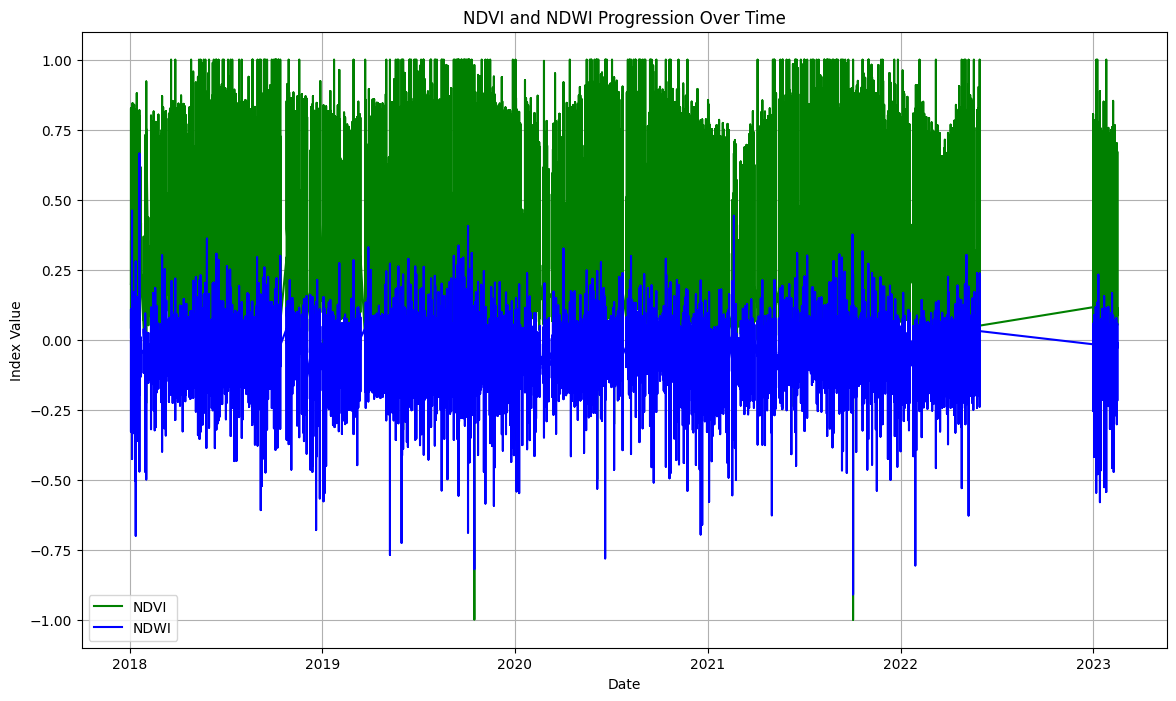

In [33]:

df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(14, 8))

# Plot NDVI
plt.plot(df['date'], df['ndvi'], label='NDVI', color='green')
# Plot NDWI
plt.plot(df['date'], df['ndwi'], label='NDWI', color='blue')

# Formatting the date axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.ylabel('Index Value')
plt.title('NDVI and NDWI Progression Over Time')
plt.legend()
plt.grid(True)
plt.show()

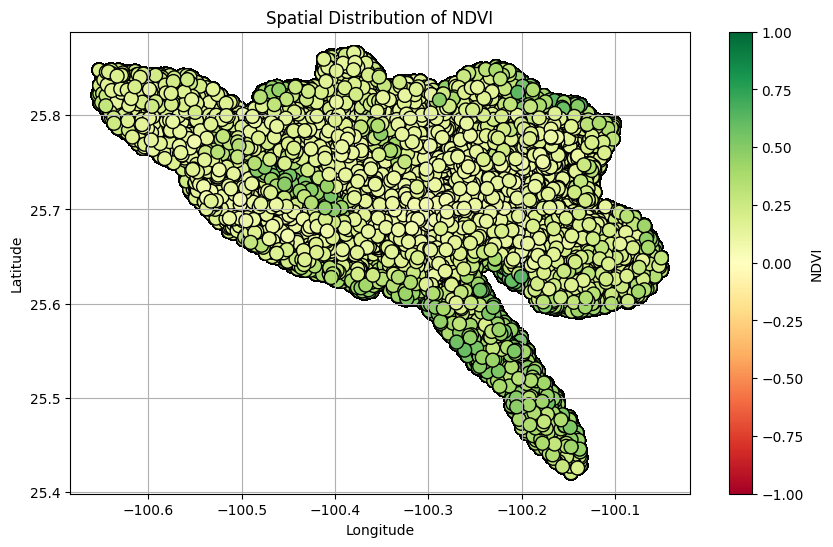

In [34]:
plt.figure(figsize=(10, 6))
sc = plt.scatter(df['longitude_x'], df['latitude_x'], c=df['ndvi'], cmap='RdYlGn', edgecolor='k', s=100)
plt.colorbar(sc, label='NDVI')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of NDVI')
plt.grid(True)
plt.show()

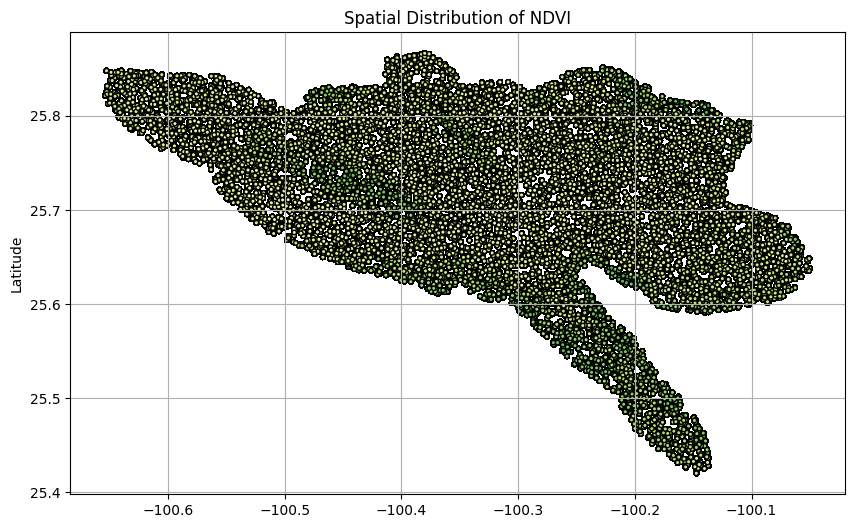

In [35]:
plt.figure(figsize=(10, 6))
sc = plt.scatter(df['longitude_x'], df['latitude_x'], c=df['ndvi'], cmap='RdYlGn', edgecolor='k', s=10)
plt.ylabel('Latitude')
plt.title('Spatial Distribution of NDVI')
plt.grid(True)
plt.show()

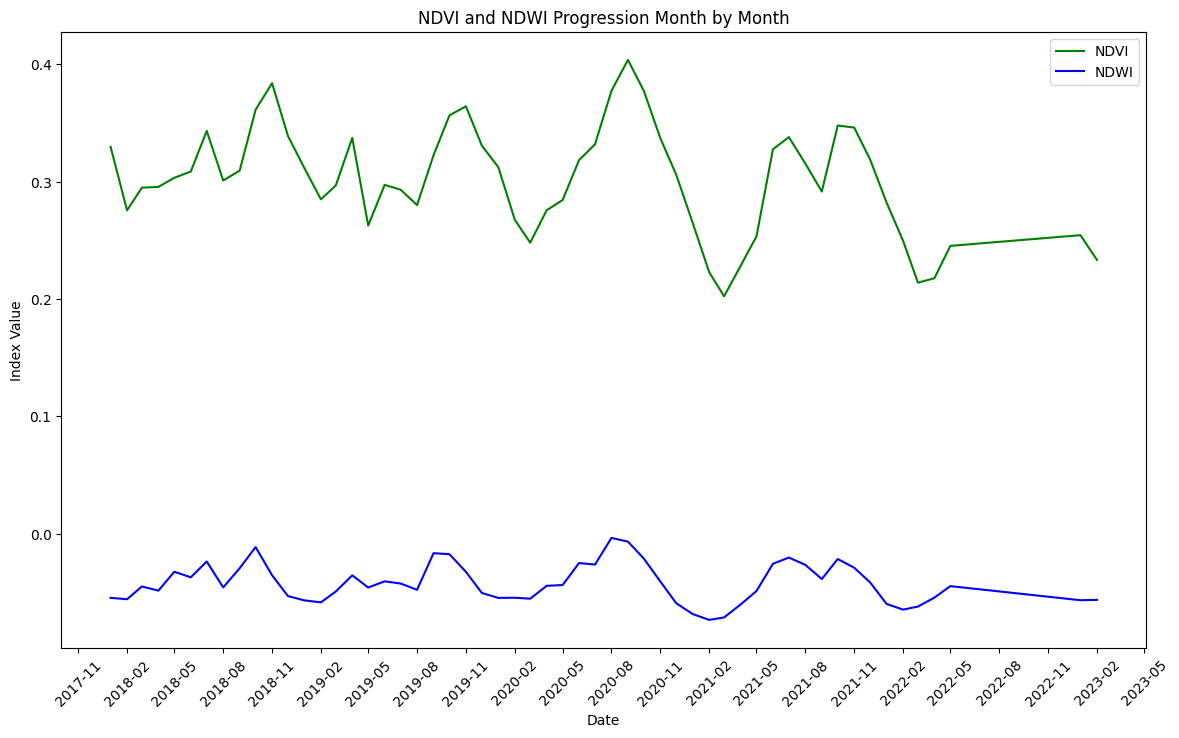

In [36]:
df['year_month'] = df['date'].dt.to_period('M')

# Aggregate mean NDVI and NDWI per month
monthly_data = df.groupby('year_month').agg({
    'ndvi': 'mean',
    'ndwi': 'mean'
}).reset_index()

monthly_data['year_month'] = monthly_data['year_month'].dt.to_timestamp()

# Plotting NDVI and NDWI by month
plt.figure(figsize=(14, 8))

# Plot NDVI
plt.plot(monthly_data['year_month'], monthly_data['ndvi'], label='NDVI', color='green')
# Plot NDWI
plt.plot(monthly_data['year_month'], monthly_data['ndwi'], label='NDWI', color='blue')

# Formatting the date axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Date')
plt.ylabel('Index Value')
plt.title('NDVI and NDWI Progression Month by Month')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.show()


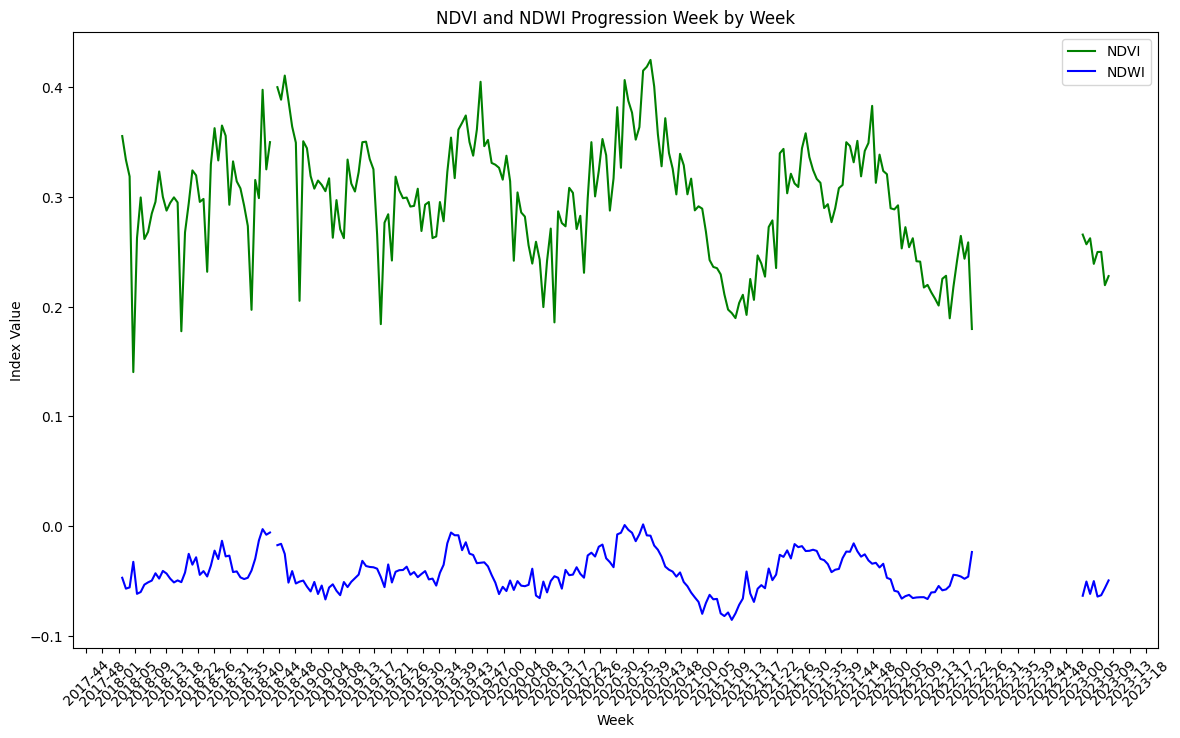

In [37]:

df['date'] = pd.to_datetime(df['date'])

# Add a column for week of the year
df['week'] = df['date'].dt.isocalendar().week

# Aggregate mean NDVI and NDWI per week
weekly_data = df.resample('W-MON', on='date').mean().reset_index()

plt.figure(figsize=(14, 8))

plt.plot(weekly_data['date'], weekly_data['ndvi'], label='NDVI', color='green')
plt.plot(weekly_data['date'], weekly_data['ndwi'], label='NDWI', color='blue')

# Formatting the date axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%W'))

plt.xlabel('Week')
plt.ylabel('Index Value')
plt.title('NDVI and NDWI Progression Week by Week')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.show()




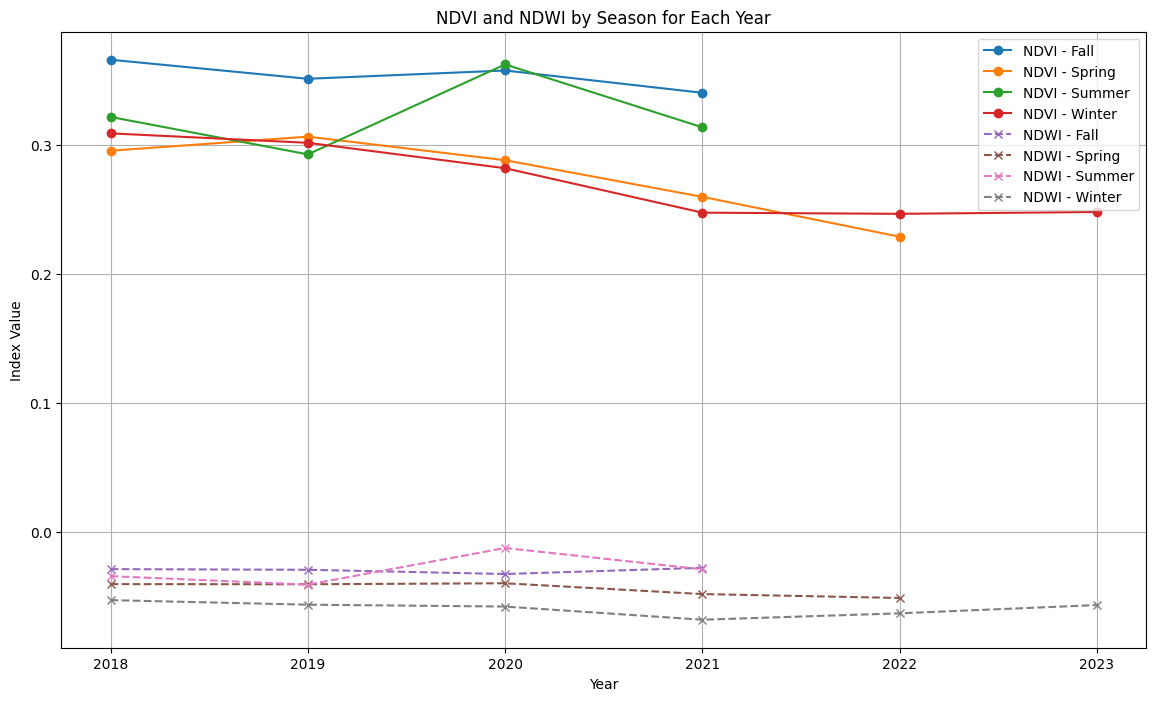

In [38]:
def get_season(date):
    Y = 2000  # dummy leap year to get the same dates for all years
    seasons = {
        'spring': (pd.Timestamp(f'{Y}-03-21'), pd.Timestamp(f'{Y}-06-20')),
        'summer': (pd.Timestamp(f'{Y}-06-21'), pd.Timestamp(f'{Y}-09-22')),
        'fall': (pd.Timestamp(f'{Y}-09-23'), pd.Timestamp(f'{Y}-12-20')),
        'winter': (pd.Timestamp(f'{Y}-12-21'), pd.Timestamp(f'{Y+1}-03-20'))
    }
    for season, (start, end) in seasons.items():
        if start <= date.replace(year=Y) <= end:
            return season
    return 'winter'

# Add season column
df['season'] = df['date'].apply(get_season)
df['year'] = df['date'].dt.year

# Aggregate mean NDVI and NDWI per season per year
seasonal_yearly_data = df.groupby(['year', 'season']).agg({
    'ndvi': 'mean',
    'ndwi': 'mean'
}).reset_index()

# Pivot to make the plot easier (seasons as columns)
seasonal_pivot = seasonal_yearly_data.pivot(index='year', columns='season', values=['ndvi', 'ndwi'])

# Plotting NDVI and NDWI by season for each year
plt.figure(figsize=(14, 8))

# Plot NDVI by season
for season in seasonal_pivot['ndvi'].columns:
    plt.plot(seasonal_pivot.index, seasonal_pivot['ndvi'][season], marker='o', linestyle='-', label=f'NDVI - {season.capitalize()}')

# Plot NDWI by season
for season in seasonal_pivot['ndwi'].columns:
    plt.plot(seasonal_pivot.index, seasonal_pivot['ndwi'][season], marker='x', linestyle='--', label=f'NDWI - {season.capitalize()}')

plt.xlabel('Year')
plt.ylabel('Index Value')
plt.title('NDVI and NDWI by Season for Each Year')
plt.legend()
plt.grid(True)
plt.show()


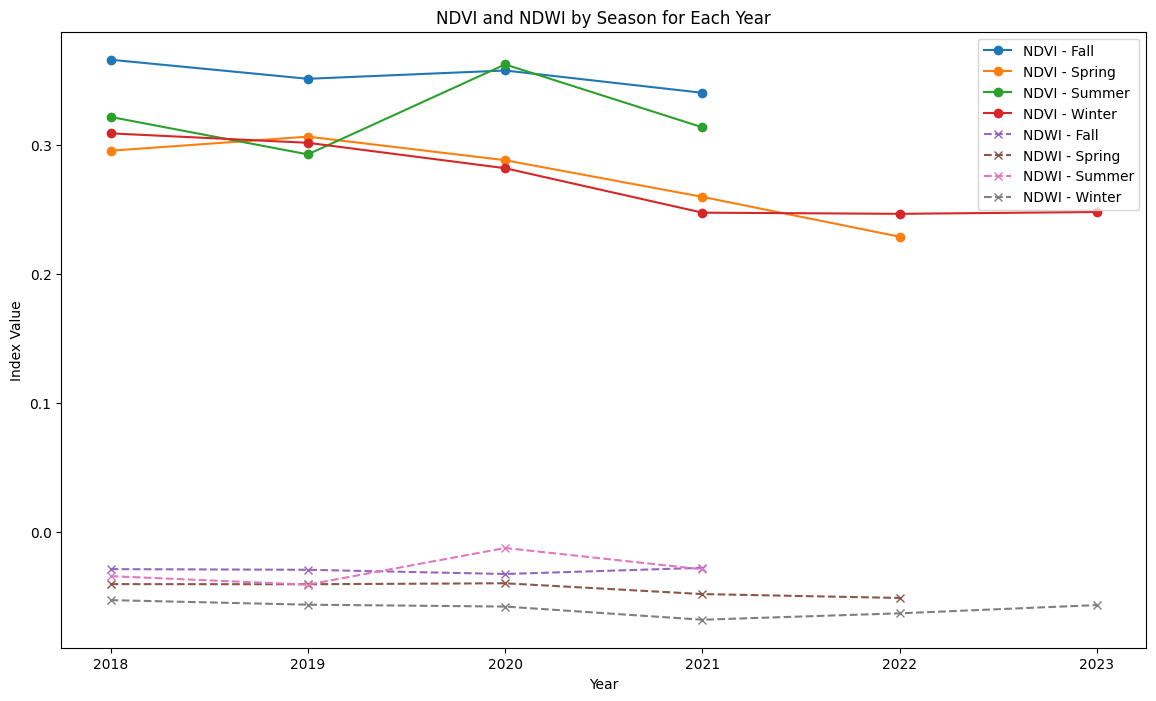

In [39]:

# Plotting NDVI and NDWI by season for each year
plt.figure(figsize=(14, 8))

# Plot NDVI by season
for season in seasonal_pivot['ndvi'].columns:
    plt.plot(seasonal_pivot.index, seasonal_pivot['ndvi'][season], marker='o', linestyle='-', label=f'NDVI - {season.capitalize()}')

# Plot NDWI by season
for season in seasonal_pivot['ndwi'].columns:
    plt.plot(seasonal_pivot.index, seasonal_pivot['ndwi'][season], marker='x', linestyle='--', label=f'NDWI - {season.capitalize()}')

plt.xlabel('Year')
plt.ylabel('Index Value')
plt.title('NDVI and NDWI by Season for Each Year')
plt.legend()
plt.grid(False)
plt.show()

### Temperature exploration

In [20]:
df = df_merged.copy()

In [21]:
df

,point_id,date,ndvi,ndwi,longitude_x,latitude_x,day,month,temp,year,longitude_y,latitude_y
0,6663,2018-01-03,0.351617,0.007602,-100.163979,25.639210,3,1,14141.0,2018,-100.163981,25.639211
1,6664,2018-01-03,0.206718,0.009730,-100.477898,25.793365,3,1,14219.0,2018,-100.477900,25.793365
2,6665,2018-01-03,0.195328,-0.049290,-100.312134,25.792776,3,1,14246.0,2018,-100.312132,25.792776
3,6666,2018-01-03,0.486111,-0.114788,-100.572845,25.835756,3,1,14258.0,2018,-100.572849,25.835756
4,6667,2018-01-03,0.145449,-0.034792,-100.363739,25.730642,3,1,14154.0,2018,-100.363737,25.730643
...,...,...,...,...,...,...,...,...,...,...,...,...
9247981,3333,2023-02-16,0.125677,-0.031687,-100.170067,25.701813,16,2,14903.0,2023,-100.170067,25.701812
9247982,3334,2023-02-16,0.289407,-0.121547,-100.465111,25.811342,16,2,15050.0,2023,-100.465108,25.811342
9247983,3335,2023-02-16,0.127319,-0.038472,-100.462471,25.788183,16,2,14971.0,2023,-100.462471,25.788183
9247984,3281,2023-02-16,0.169365,-0.022893,-100.146584,25.671944,16,2,14888.0,2023,-100.146582,25.671944


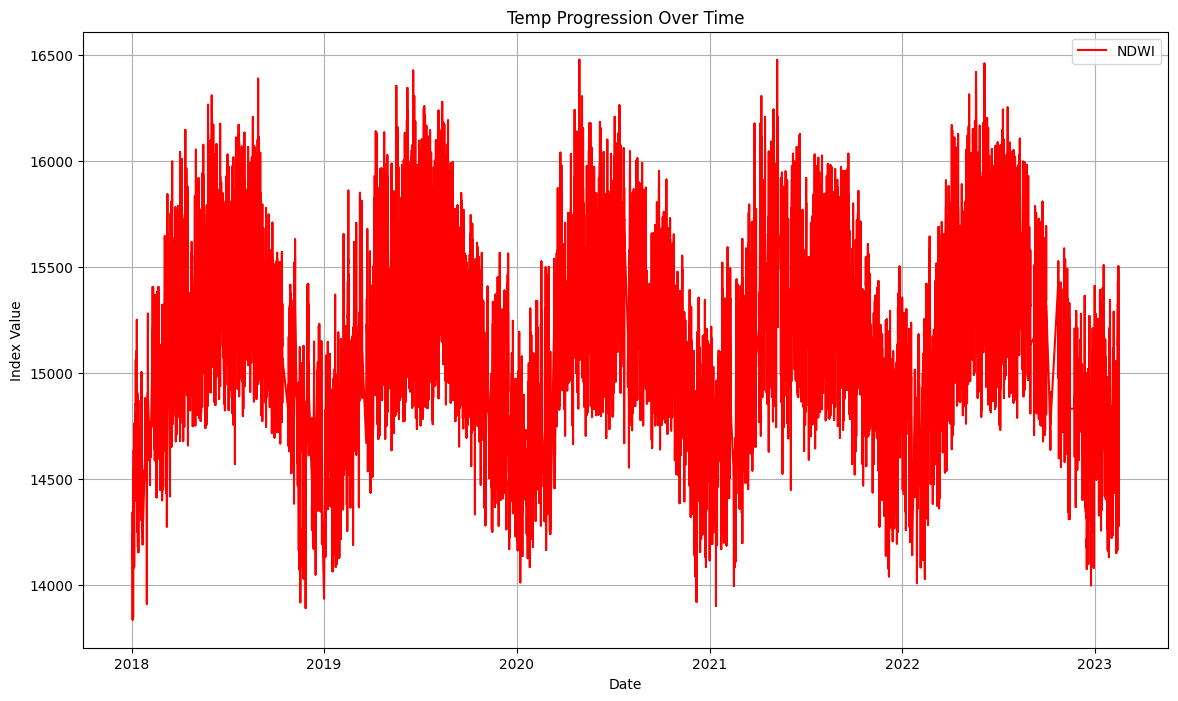

In [27]:

df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(14, 8))

# Plot NDWI
plt.plot(df['date'], df['temp'], label='NDWI', color='red')

# Formatting the date axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.ylabel('Index Value')
plt.title('Temp Progression Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# escalar temperatura, ndvi, ndwi
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['temp_esc', 'ndvi_esc', 'ndwi_esc']] = scaler.fit_transform(df[['temp', 'ndvi', 'ndwi']])
df


,point_id,date,ndvi,ndwi,longitude_x,latitude_x,day,month,temp,year,longitude_y,latitude_y,temp_esc,ndvi_esc,ndwi_esc
0,6663,2018-01-03,0.351617,0.007602,-100.163979,25.639210,3,1,14141.0,2018,-100.163981,25.639211,-3.069086,0.294258,1.116776
1,6664,2018-01-03,0.206718,0.009730,-100.477898,25.793365,3,1,14219.0,2018,-100.477900,25.793365,-2.864145,-0.528969,1.166569
2,6665,2018-01-03,0.195328,-0.049290,-100.312134,25.792776,3,1,14246.0,2018,-100.312132,25.792776,-2.793204,-0.593683,-0.214320
3,6666,2018-01-03,0.486111,-0.114788,-100.572845,25.835756,3,1,14258.0,2018,-100.572849,25.835756,-2.761674,1.058367,-1.746766
4,6667,2018-01-03,0.145449,-0.034792,-100.363739,25.730642,3,1,14154.0,2018,-100.363737,25.730643,-3.034929,-0.877064,0.124901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9247981,3333,2023-02-16,0.125677,-0.031687,-100.170067,25.701813,16,2,14903.0,2023,-100.170067,25.701812,-1.066968,-0.989394,0.197547
9247982,3334,2023-02-16,0.289407,-0.121547,-100.465111,25.811342,16,2,15050.0,2023,-100.465108,25.811342,-0.680733,-0.059183,-1.904905
9247983,3335,2023-02-16,0.127319,-0.038472,-100.462471,25.788183,16,2,14971.0,2023,-100.462471,25.788183,-0.888302,-0.980065,0.038795
9247984,3281,2023-02-16,0.169365,-0.022893,-100.146584,25.671944,16,2,14888.0,2023,-100.146582,25.671944,-1.106380,-0.741188,0.403301


c:\Users\avril\repos\TopoAI\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


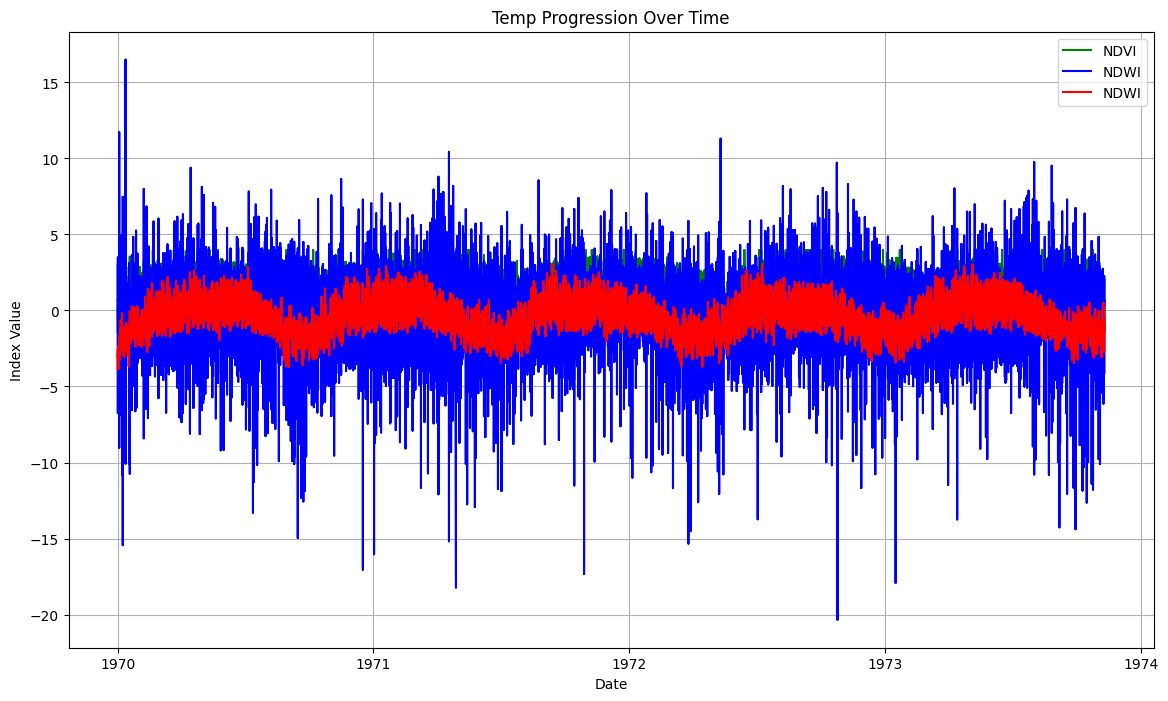

In [23]:

plt.figure(figsize=(14, 8))
# Plot NDVI
plt.plot(df['date'], df['ndvi_esc'], label='NDVI', color='green')
# Plot NDWI
plt.plot(df['date'], df['ndwi_esc'], label='NDWI', color='blue')

# Plot temp
plt.plot(df['date'], df['temp_esc'], label='NDWI', color='red')

# Formatting the date axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.ylabel('Index Value')
plt.title('Temp Progression Over Time')
plt.legend()
plt.grid(True)
plt.show()

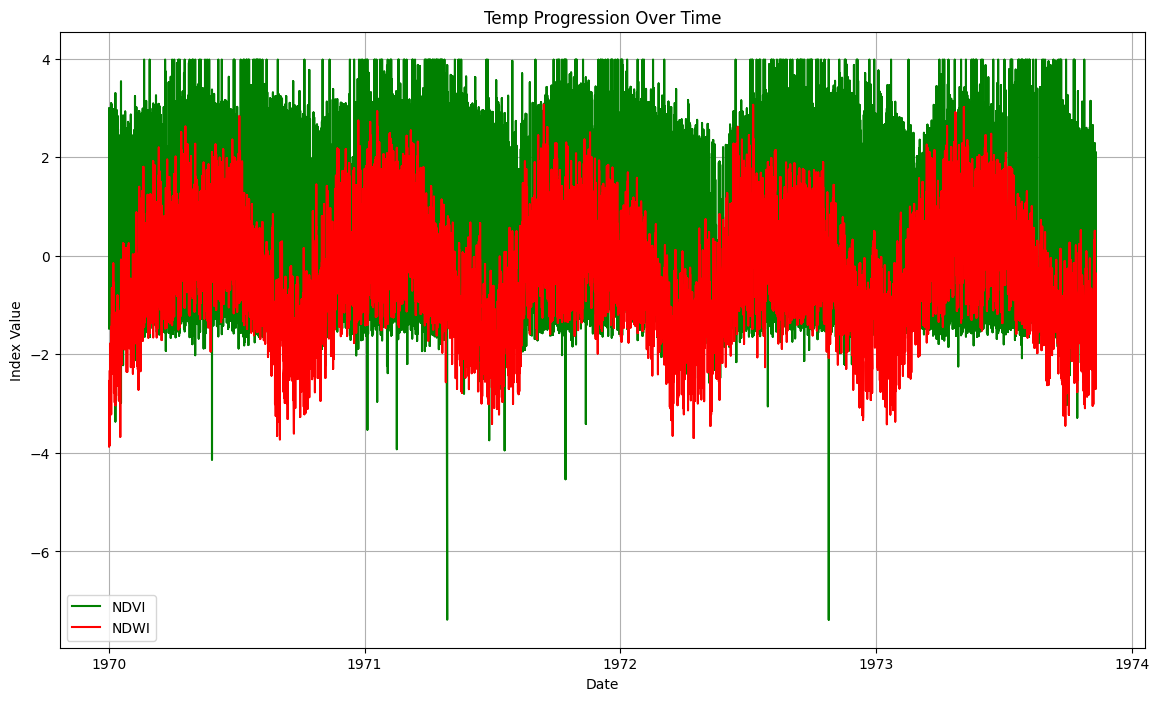

In [25]:
plt.figure(figsize=(14, 8))
# Plot NDvI
plt.plot(df['date'], df['ndvi_esc'], label='NDVI', color='green')

# Plot temp
plt.plot(df['date'], df['temp_esc'], label='NDWI', color='red')

# Formatting the date axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.ylabel('Index Value')
plt.title('Temp Progression Over Time')
plt.legend()
plt.grid(True)
plt.show()

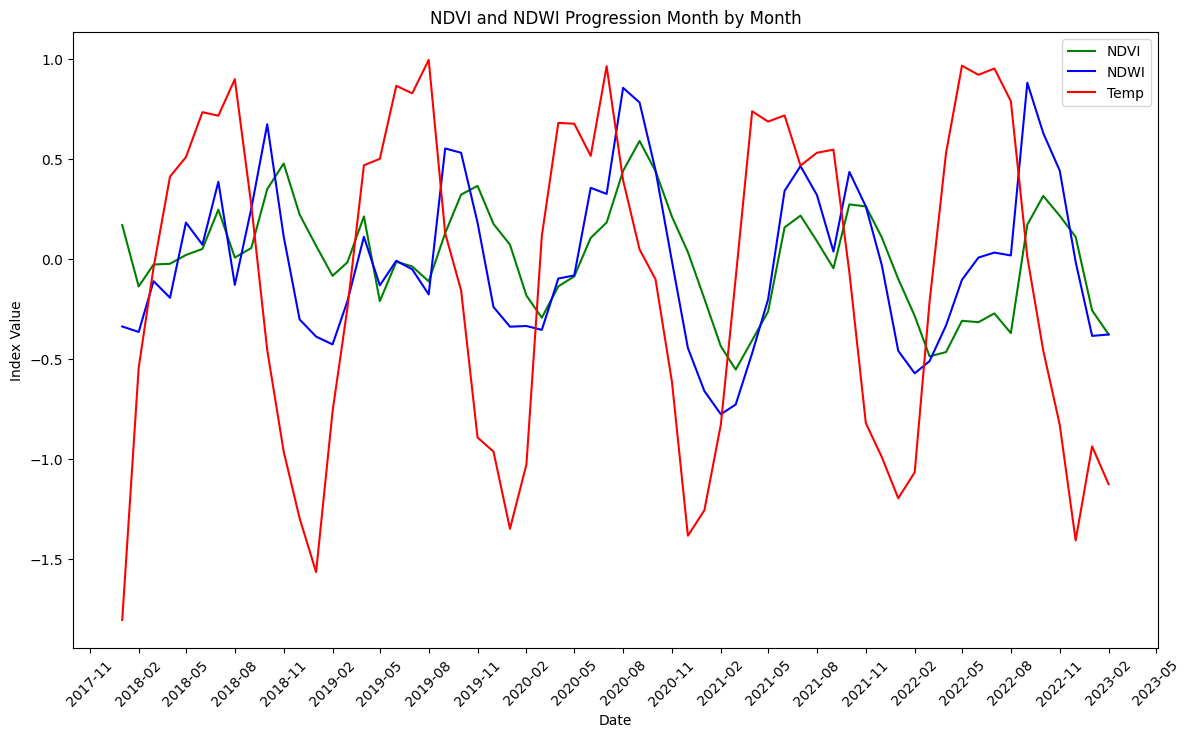

In [29]:
df['year_month'] = df['date'].dt.to_period('M')

# Aggregate mean NDVI and NDWI per month
monthly_data = df.groupby('year_month').agg({
    'ndvi_esc': 'mean',
    'ndwi_esc': 'mean',
    'temp_esc': 'mean'
}).reset_index()

monthly_data['year_month'] = monthly_data['year_month'].dt.to_timestamp()

# Plotting NDVI and NDWI by month
plt.figure(figsize=(14, 8))

# Plot NDVI
plt.plot(monthly_data['year_month'], monthly_data['ndvi_esc'], label='NDVI', color='green')
# Plot NDWI
plt.plot(monthly_data['year_month'], monthly_data['ndwi_esc'], label='NDWI', color='blue')

# Plot temp
plt.plot(monthly_data['year_month'], monthly_data['temp_esc'], label='Temp', color='red')

# Formatting the date axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Date')
plt.ylabel('Index Value')
plt.title('NDVI and NDWI Progression Month by Month')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.show()


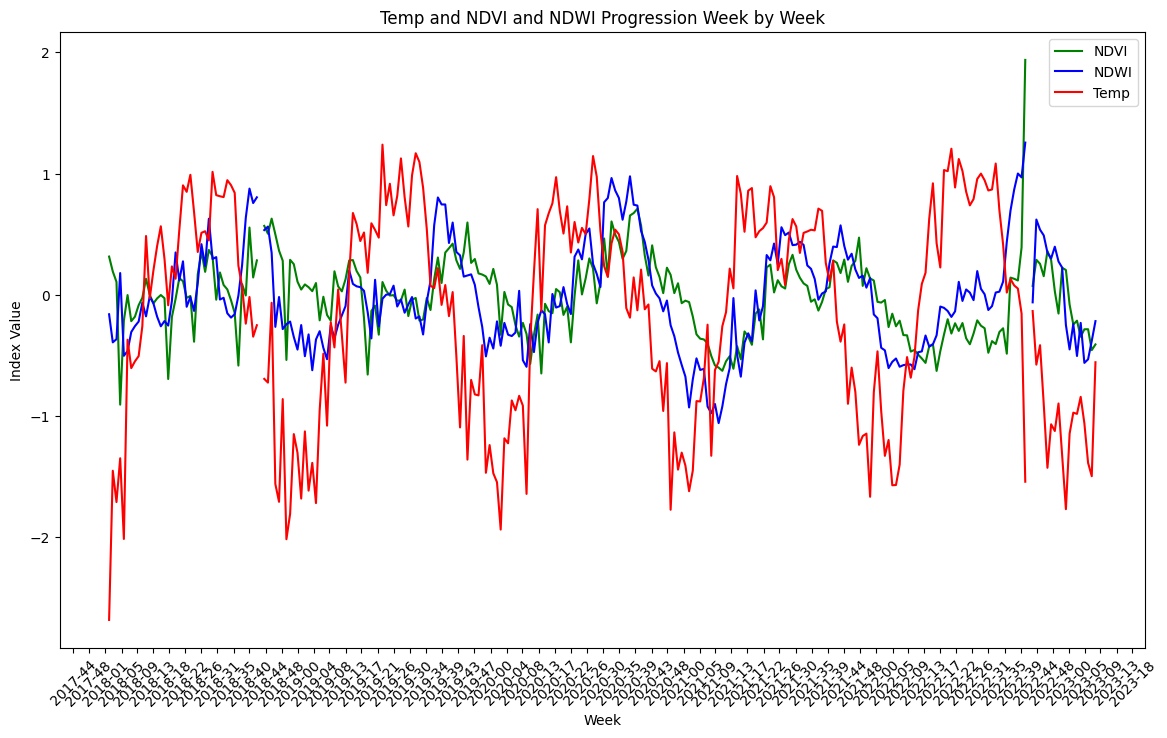

In [30]:

df['date'] = pd.to_datetime(df['date'])

# Add a column for week of the year
df['week'] = df['date'].dt.isocalendar().week

# Aggregate mean NDVI and NDWI per week
weekly_data = df.resample('W-MON', on='date').mean().reset_index()

plt.figure(figsize=(14, 8))

plt.plot(weekly_data['date'], weekly_data['ndvi_esc'], label='NDVI', color='green')
plt.plot(weekly_data['date'], weekly_data['ndwi_esc'], label='NDWI', color='blue')

plt.plot(weekly_data['date'], weekly_data['temp_esc'], label='Temp', color='red')
# Formatting the date axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%W'))

plt.xlabel('Week')
plt.ylabel('Index Value')
plt.title('Temp and NDVI and NDWI Progression Week by Week')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.show()




In [31]:
def get_season(date):
    Y = 2000  # dummy leap year to get the same dates for all years
    seasons = {
        'spring': (pd.Timestamp(f'{Y}-03-21'), pd.Timestamp(f'{Y}-06-20')),
        'summer': (pd.Timestamp(f'{Y}-06-21'), pd.Timestamp(f'{Y}-09-22')),
        'fall': (pd.Timestamp(f'{Y}-09-23'), pd.Timestamp(f'{Y}-12-20')),
        'winter': (pd.Timestamp(f'{Y}-12-21'), pd.Timestamp(f'{Y+1}-03-20'))
    }
    for season, (start, end) in seasons.items():
        if start <= date.replace(year=Y) <= end:
            return season
    return 'winter'

# Add season column
df['season'] = df['date'].apply(get_season)
df['year'] = df['date'].dt.year

# Aggregate mean NDVI and NDWI per season per year
seasonal_yearly_data = df.groupby(['year', 'season']).agg({
    'ndvi_esc': 'mean',
    'ndwi_esc': 'mean',
    'temp_esc': 'mean'
}).reset_index()

# Pivot to make the plot easier (seasons as columns)
seasonal_pivot = seasonal_yearly_data.pivot(index='year', columns='season', values=['ndvi_esc', 'ndwi_esc'])

# Plotting NDVI and NDWI by season for each year
plt.figure(figsize=(14, 8))

# Plot NDVI by season
for season in seasonal_pivot['ndvi'].columns:
    plt.plot(seasonal_pivot.index, seasonal_pivot['ndvi_esc'][season], marker='o', linestyle='-', label=f'NDVI - {season.capitalize()}')

# Plot NDWI by season
for season in seasonal_pivot['ndwi'].columns:
    plt.plot(seasonal_pivot.index, seasonal_pivot['ndwi_esc'][season], marker='x', linestyle='--', label=f'NDWI - {season.capitalize()}')

# Plot temp by season
for season in seasonal_pivot['temp'].columns:
    plt.plot(seasonal_pivot.index, seasonal_pivot['temp_esc'][season], marker='x', linestyle='--', label=f'Temp - {season.capitalize()}')
    
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.title('NDVI and NDWI by Season for Each Year')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'ndvi'

<Figure size 1400x800 with 0 Axes>

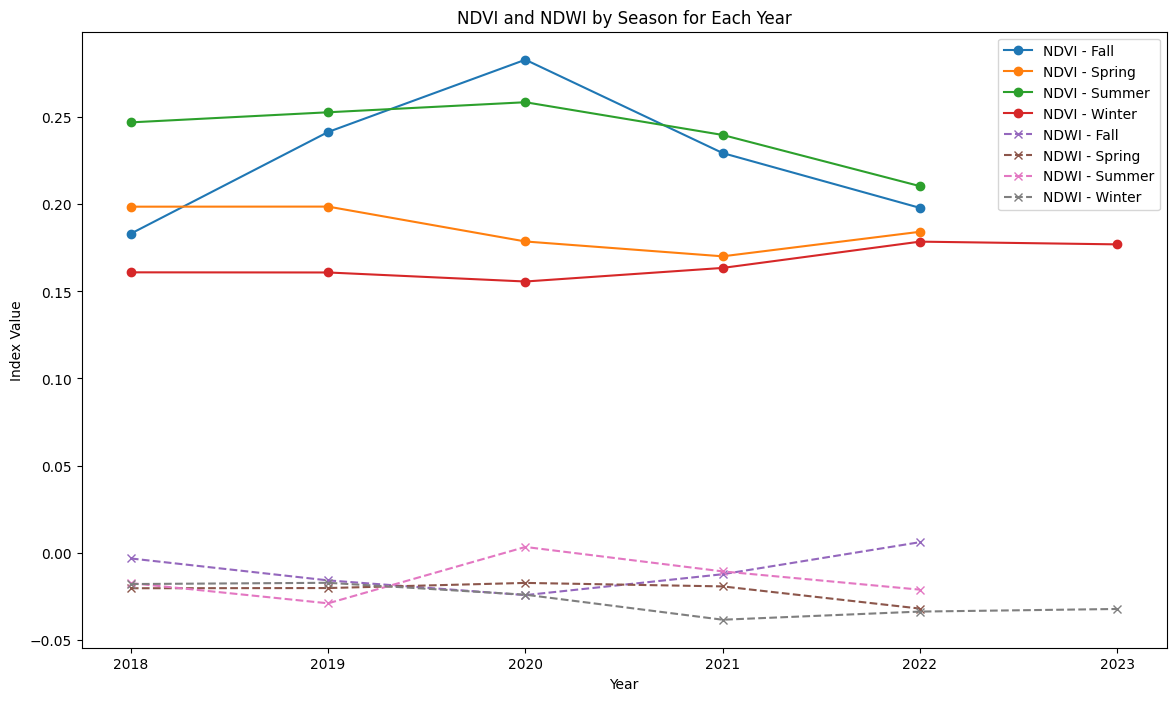

In [ ]:

# Plotting NDVI and NDWI by season for each year
plt.figure(figsize=(14, 8))

# Plot NDVI by season
for season in seasonal_pivot['ndvi'].columns:
    plt.plot(seasonal_pivot.index, seasonal_pivot['ndvi_esc'][season], marker='o', linestyle='-', label=f'NDVI - {season.capitalize()}')

# Plot NDWI by season
for season in seasonal_pivot['ndwi'].columns:
    plt.plot(seasonal_pivot.index, seasonal_pivot['ndwi_esc'][season], marker='x', linestyle='--', label=f'NDWI - {season.capitalize()}')

# Plot temp by season
for season in seasonal_pivot['temp'].columns:
    plt.plot(seasonal_pivot.index, seasonal_pivot['temp_esc'][season], marker='x', linestyle='--', label=f'Temp - {season.capitalize()}')
    

plt.xlabel('Year')
plt.ylabel('Index Value')
plt.title('NDVI and NDWI by Season for Each Year')
plt.legend()
plt.grid(False)
plt.show()

In [32]:
# df to csv 
df.to_csv('vegetation_water_index_temp.csv', index=False)

### correlaciones

In [34]:
# correlaciones entre variables numéricas

df.columns


Index(['point_id', 'date', 'ndvi', 'ndwi', 'longitude_x', 'latitude_x', 'day',
       'month', 'temp', 'year', 'longitude_y', 'latitude_y', 'temp_esc',
       'ndvi_esc', 'ndwi_esc', 'year_month', 'week', 'season'],
      dtype='object')

In [39]:
df_cor = df[[ 'ndvi', 'ndwi', 'longitude_x', 'latitude_x', 'day',
       'month', 'temp', 'year', 'temp_esc',
       'ndvi_esc', 'ndwi_esc', 'year_month', 'week']]
df_cor

,ndvi,ndwi,longitude_x,latitude_x,day,month,temp,year,temp_esc,ndvi_esc,ndwi_esc,year_month,week
0,0.351617,0.007602,-100.163979,25.639210,3,1,14141.0,2018,-3.069086,0.294258,1.116776,2018-01,1
1,0.206718,0.009730,-100.477898,25.793365,3,1,14219.0,2018,-2.864145,-0.528969,1.166569,2018-01,1
2,0.195328,-0.049290,-100.312134,25.792776,3,1,14246.0,2018,-2.793204,-0.593683,-0.214320,2018-01,1
3,0.486111,-0.114788,-100.572845,25.835756,3,1,14258.0,2018,-2.761674,1.058367,-1.746766,2018-01,1
4,0.145449,-0.034792,-100.363739,25.730642,3,1,14154.0,2018,-3.034929,-0.877064,0.124901,2018-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9247981,0.125677,-0.031687,-100.170067,25.701813,16,2,14903.0,2023,-1.066968,-0.989394,0.197547,2023-02,7
9247982,0.289407,-0.121547,-100.465111,25.811342,16,2,15050.0,2023,-0.680733,-0.059183,-1.904905,2023-02,7
9247983,0.127319,-0.038472,-100.462471,25.788183,16,2,14971.0,2023,-0.888302,-0.980065,0.038795,2023-02,7
9247984,0.169365,-0.022893,-100.146584,25.671944,16,2,14888.0,2023,-1.106380,-0.741188,0.403301,2023-02,7


In [42]:
# Select only numeric columns
df_numeric = df_cor.select_dtypes(include=[float, int])
df_numeric

,ndvi,ndwi,longitude_x,latitude_x,day,month,temp,year,temp_esc,ndvi_esc,ndwi_esc
0,0.351617,0.007602,-100.163979,25.639210,3,1,14141.0,2018,-3.069086,0.294258,1.116776
1,0.206718,0.009730,-100.477898,25.793365,3,1,14219.0,2018,-2.864145,-0.528969,1.166569
2,0.195328,-0.049290,-100.312134,25.792776,3,1,14246.0,2018,-2.793204,-0.593683,-0.214320
3,0.486111,-0.114788,-100.572845,25.835756,3,1,14258.0,2018,-2.761674,1.058367,-1.746766
4,0.145449,-0.034792,-100.363739,25.730642,3,1,14154.0,2018,-3.034929,-0.877064,0.124901
...,...,...,...,...,...,...,...,...,...,...,...
9247981,0.125677,-0.031687,-100.170067,25.701813,16,2,14903.0,2023,-1.066968,-0.989394,0.197547
9247982,0.289407,-0.121547,-100.465111,25.811342,16,2,15050.0,2023,-0.680733,-0.059183,-1.904905
9247983,0.127319,-0.038472,-100.462471,25.788183,16,2,14971.0,2023,-0.888302,-0.980065,0.038795
9247984,0.169365,-0.022893,-100.146584,25.671944,16,2,14888.0,2023,-1.106380,-0.741188,0.403301


In [44]:

# Calculate correlation
correlation_matrix = df_numeric.corr()

correlation_matrix

,ndvi,ndwi,longitude_x,latitude_x,day,month,temp,year,temp_esc,ndvi_esc,ndwi_esc
ndvi,1.000000,0.000720,0.196287,-3.744469e-01,-4.492942e-03,0.160032,-0.235529,-0.119233,-0.235529,1.000000,0.000720
ndwi,0.000720,1.000000,0.203200,-1.749734e-01,-1.874981e-03,0.220121,0.021977,-0.050036,0.021977,0.000720,1.000000
longitude_x,0.196287,0.203200,1.000000,-4.689951e-01,4.227286e-04,0.001637,-0.055244,-0.005534,-0.055244,0.196287,0.203200
latitude_x,-0.374447,-0.174973,-0.468995,1.000000e+00,-6.461744e-07,-0.001203,0.216707,-0.002281,0.216707,-0.374447,-0.174973
day,-0.004493,-0.001875,0.000423,-6.461744e-07,1.000000e+00,0.026178,0.007855,-0.001220,0.007855,-0.004493,-0.001875
month,0.160032,0.220121,0.001637,-1.202538e-03,2.617788e-02,1.000000,0.014618,-0.125907,0.014618,0.160032,0.220121
temp,-0.235529,0.021977,-0.055244,2.167067e-01,7.855094e-03,0.014618,1.000000,-0.062959,1.000000,-0.235529,0.021977
year,-0.119233,-0.050036,-0.005534,-2.280997e-03,-1.220217e-03,-0.125907,-0.062959,1.000000,-0.062959,-0.119233,-0.050036
temp_esc,-0.235529,0.021977,-0.055244,2.167067e-01,7.855094e-03,0.014618,1.000000,-0.062959,1.000000,-0.235529,0.021977
ndvi_esc,1.000000,0.000720,0.196287,-3.744469e-01,-4.492942e-03,0.160032,-0.235529,-0.119233,-0.235529,1.000000,0.000720


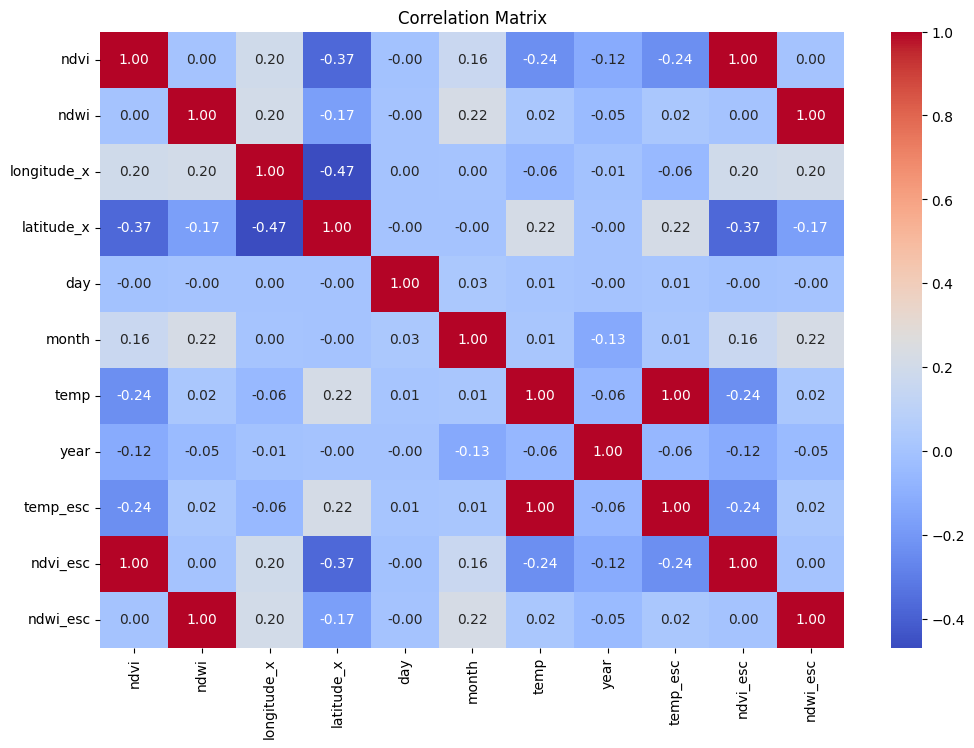

In [47]:
# visualizar con heatmap
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()